## FML Project 7 - Market Basket Anlysis on Music and Mental Health Survey 
## Ayden Shankman and Gavri Kepets

In this project, we performed market basket analysis on the Kaggle dataset called "Music & Mental Health Survey Results" which consists of 736 different people, their music tastes and habits, their mental health levels, and whether they think music improves, has no effect on, or worsens their mental health.
The dataset can be found at this link:
https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

The first 10 attributes are the respondents answers to generic questions focused on musical background and listening habits. These include:

1. Age (which we filter into 5 categories of common age ranges: 10-17, 18-21, 22-29, 30-49, and 50+)
2. Primary Streaming Service (which we did not use because we do not believe it will give any interesting insights about music and mental health)
3. Hours per day listening to music (which we filter into 6 categories: <2, 2-3, 3-4, 4-5, 5-6, and 6+)
4. If they listen to music while working
5. If they play an instrument
6. If they compose music
7. They're favorite genre (out of the 16 listed below)
8. If they actively explore new artists/genres
9. If they regularly listen to music with lyrics not from their native language
10. BPM of their favorite genre (which we filter into 5 categories of common BPM ranges: unknown, <108, 108-120, 120-168, and 168+

The next 14 atributes are the frequency at which they listen to 16 different genres (Never, Rarely, Sometimes, Very frequently). The genres are:

1. Classical
2. Country
3. EDM
4. Folk
5. Gospel
6. Hip hop
7. Jazz
8. K pop
9. Latin
10. Lofi 
11. Metal
12. Pop
13. R&B
14. Rap
15. Rock 
16. Video game music

The next 4 attributes are the levels (1-10) that each person exeperiences different mental illnesses. We filter the levels into 3 categories: low (0-3), medium (3-6), and high (6-10). The 4 illnesses are:

1. Anxiety
2. Depression
3. Insomnia
4. OCD

The final attribute is if they believe that Music improves, has no effect on, or worsens their mental health conditions.

The dataset was proccessed according to the format above and then one-hot-encoded to convert the dataset into a shopping cart dataset. That dataset was then inputted into the apriori function from the mlxtend library from:
http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori
We chose a minimum support of 0.2 because some of the itemsets we wanted to check, such as people aged 60+, were less than 3% of the dataset.





In [3]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

def preprocessed_data():
  data = pd.read_csv("mxmh_survey_results.csv")
  data = data.drop(columns=["Timestamp", "Primary streaming service", "Permissions"])

  processed_data = []
  columns = data.columns

  rows = []
  for index, row in data.iterrows():
    age = 'Age: '

    if row['Age'] < 18:
      age += str('10-17')
    elif row['Age'] < 22:
      age += str('18-21')
    elif row['Age'] < 30:
      age += str('22-29')
    elif row['Age'] < 50:
      age += str('30-49')
    elif row['Age'] < 60:
      age += str('50-59')
    else:
      age += str('60+')
    
    hours = 'Hours per day: '

    if row['Hours per day'] < 2:
      hours += str('<2')
    elif row['Hours per day'] < 3:
      hours += str('2-3')
    elif row['Hours per day'] < 4:
      hours += str('3-4')
    elif row['Hours per day'] < 5:
      hours += str('4-5')
    elif row['Hours per day'] < 6:
      hours += str('5-6')
    else:
      hours += str('6+')
    
    bpm = 'BPM: '

    if np.isnan(row['BPM']):
      bpm += 'unk'
    elif row['BPM'] < 108:
      bpm += '< 108'
    elif row['BPM'] < 120:
      bpm += '108-120'
    elif row['BPM'] < 168:
      bpm += '120-168'
    else:
      bpm += '168+'

    new_row = []
    for c in data.columns:
      if c == 'Age':
        new_row.append(age)
      elif c == 'Hours per day':
        new_row.append(hours)
      elif c == 'BPM':
        new_row.append(bpm)
      elif c == 'Insomnia' or c == 'Anxiety' or c == 'Depression' or c == 'OCD':
        if float(row[c]) > 6:
            new_row.append(str(c) + ": " + str('high')) 
        elif float(row[c]) > 3:
            new_row.append(str(c) + ": " + str('medium'))
        else:
            new_row.append(str(c) + ": " + str('low'))
      else:
        new_row.append(str(c) + ": " + str(row[c])) 
      
    rows.append(new_row)
    

  te = TransactionEncoder()
  te_ary = te.fit(rows).transform(rows)
  df = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
  return df


df = preprocessed_data()
out = apriori(df, min_support=0.02, use_colnames=True)

# Obtaining Percentages and Performing Analysis
To perform certain analysis, we first found out percentage of poeple that reported a certain trait. Then we found the percentage of people that reported that trait along with another trait. We then divided the second percentage by the first to get the final percentage.

Example: To obtain the percentage of people who say that music improves their mental health and also report that they listen to 6+ hours of music a day, we first find the total percentage who report that music benefits their mental health (73.6%). We then find the percentage of people who report that music benefits AND that they listen to 6+ hours a day (13.8%). We then divide the seocnd number by the first to get the final percentage (~19%).

In [17]:
ins = out["itemsets"].apply(lambda x: True if 'Music effects: Improve' in x else False)
display(out[ins].head(1))

ins = out["itemsets"].apply(lambda x: True if 'Hours per day: 6+' in x and 'Music effects: Improve' in x else False)
display(out[ins].head(1))


,support,itemsets
100,0.736413,(Music effects: Improve)


,support,itemsets
3073,0.138587,"(Music effects: Improve, Hours per day: 6+)"


# Creating Graphs

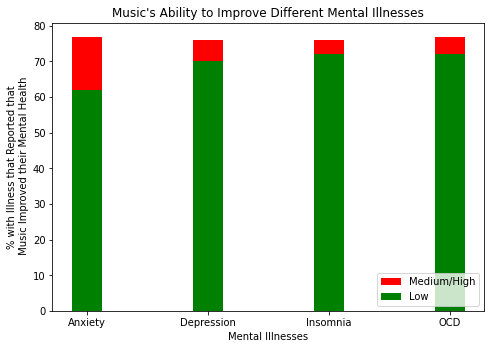

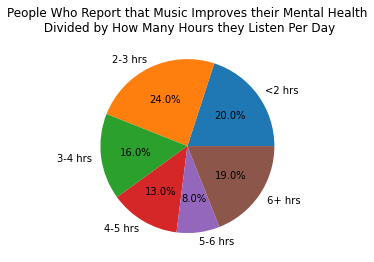

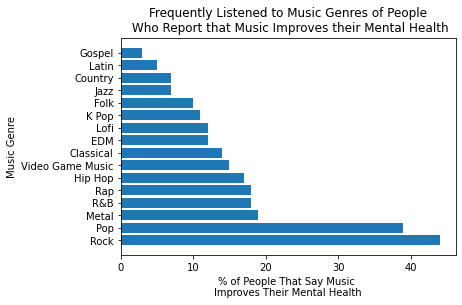

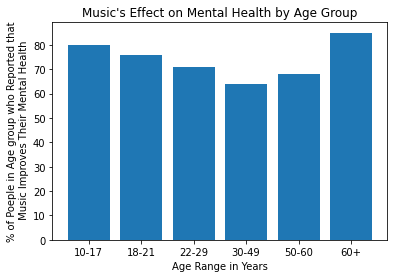

In [18]:
import matplotlib.pyplot as plt

# Percentages of People with Different Mental Illnesses that Reported that Music Improves their Mental Health
ill_perc = np.array([[77, 76, 76, 77], [62, 70, 72, 72]])
ill_lab = ["Anxiety", "Depression", "Insomnia", "OCD"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ill_lab, ill_perc[0], color = 'r', width = 0.25)
ax.bar(ill_lab, ill_perc[1], color = 'g', width = 0.25)
ax.set_title("Music's Ability to Improve Different Mental Illnesses")
ax.set_xlabel("Mental Illnesses")
ax.set_ylabel("% with Illness that Reported that\n Music Improved their Mental Health")
ax.legend(labels=['Medium/High', 'Low'], loc = 'lower right')

# People Who Report that Music Improves their Mental Health Divided by How Many Hours they Listen Per Day 
hour_perc = np.array([20, 24, 16, 13, 8, 19])
hour_lab = ["<2 hrs", "2-3 hrs", "3-4 hrs", "4-5 hrs", "5-6 hrs", "6+ hrs"]
plt.figure()
plt.pie(hour_perc, labels = hour_lab, autopct = '%1.1f%%')
plt.title("People Who Report that Music Improves their Mental Health\n Divided by How Many Hours they Listen Per Day")
plt.show()
print("")

# Frequently Listened to Music Genres of People Who Report that Music Improves their Mental Health
genre_perc = np.array([44,39,19,18,18,17,15,14,12,12,11,10,7,7,5,3])
genre_lab = ['Rock', 'Pop', 'Metal', 'R&B', 'Rap', 'Hip Hop','Video Game Music', "Classical", "EDM", "Lofi", 'K Pop', "Folk", "Jazz", "Country", "Latin", "Gospel"]
plt.figure()
plt.barh(genre_lab,genre_perc)
plt.title("Frequently Listened to Music Genres of People\n Who Report that Music Improves their Mental Health")
plt.xlabel("% of People That Say Music \nImproves Their Mental Health")
plt.ylabel("Music Genre")
plt.show()
print("")

# Percentages of People in Age Ranges who Reported that Music Improves Their Mental Health
age_perc = np.array([80,76,71,64,68,85])
age_lab = ["10-17", "18-21", "22-29", "30-49", "50-60","60+"]
plt.figure()
plt.bar(age_lab,age_perc)
plt.title("Music's Effect on Mental Health by Age Group")
plt.xlabel("Age Range in Years")
plt.ylabel("% of Poeple in Age group who Reported that\n Music Improves Their Mental Health")
plt.show()


# Results
Below are the results that we obtained that we felt were worthy of mentioning.
##74% of all people in the survey reported that music improves their mental health

---


### Listening While Working


* 78% who reported that they listen to music while working reported that music improves their mental health
* 60% who reported that they don't  listen to music while working reported that music improves their mental health

Conclusion: Listening to music while you work is likely to improve your mental health.

---
### BPM and Music's Effect on Mental Health
* 45% of people who reported that music improves their mental health have a favorite genre with a ***fast*** BPM (>120 BPM)
* 29% of people who reported that music improves their mental health have a favorite genre with a ***slow*** BPM (<108 BPM)
* 29% of people who reported that music improves their mental health have a favorite genre with a ***medium*** BPM (108-120 BPM)

  Conclusion: Most people who say that music improves their mental health listen to genres with either fast or slow BPM, but rarely in the middle.


---


### Musical Talent and Music's Effect on Mental Health
* 80% who reported that they compose music or play an instrument reported that music improves their mental health 

* Conclusion: Playing an instrument or composing music might make you more susceptible to getting mental health benefits from music.


---


### Music's Effect on Different Mental Illnesses
* Conclusion: If you have medium or high Anxiety, Depression, Insomnia, or OCD, music is more likely to benefit your mental health than if you have low levels of mental illness.


---


### Music's Effect on Mental Illnesses Based on How Many Hours Listened Per Day
* Conclusion: People who say that Music benefits their mental health usually listen to 3 hours or less and those who listen to more get smaller in number. However, it picks back up again once you reach the 6+ hour area. People who say it helps either listen to not so much music or alot but not much in between.


---


### Most Frequent Genres Associated with Mental Health Benefits
* Conclusion: People who say that music benefits their mental health most frequently listen to Rock, Pop, and Metal very frequently (which each have either high or low BPM on average)


---

### Music's Effect on Mental Health Based on Age Group
* Conclusion: Younger people are more likely to think music benefits their mental health but it gets less prominent as you get older and is worst between 30-50. However, after 50, people report more frequenty ythat they believe it does help. This actually matches closely with the Self-reported well being by age group data.

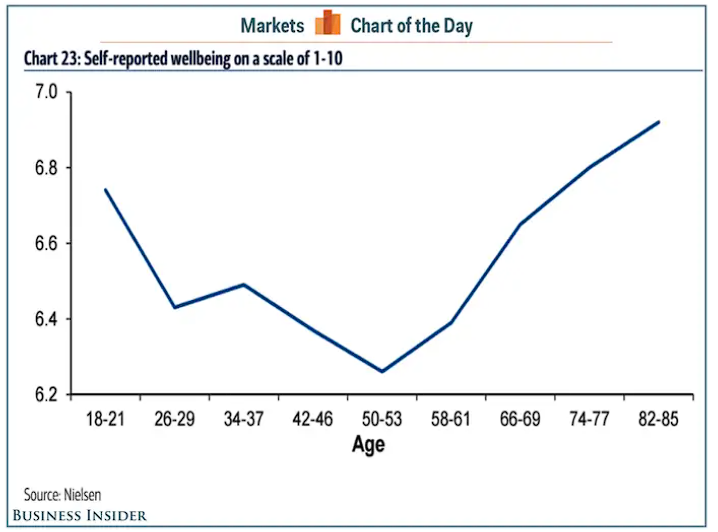

# Conclusion
## Regardless of age or mental health issues, music is proven to have significant benefit for the improvement of mental health. 

